In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
import sys
print(sys.executable)
print(sys.version)

c:\Users\Asty\anaconda3\python.exe
3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]


In [67]:
!pip install niapy

In [68]:
import niapy
print(dir(niapy.algorithms.basic))

['AgingNpDifferentialEvolution', 'ArtificialBeeColonyAlgorithm', 'BacterialForagingOptimization', 'BareBonesFireworksAlgorithm', 'BatAlgorithm', 'BeesAlgorithm', 'CamelAlgorithm', 'CatSwarmOptimization', 'CenterParticleSwarmOptimization', 'ClonalSelectionAlgorithm', 'ComprehensiveLearningParticleSwarmOptimizer', 'CoralReefsOptimization', 'CuckooSearch', 'DifferentialEvolution', 'DynNpDifferentialEvolution', 'DynNpMultiStrategyDifferentialEvolution', 'DynamicFireworksAlgorithm', 'DynamicFireworksAlgorithmGauss', 'EnhancedFireworksAlgorithm', 'EvolutionStrategy1p1', 'EvolutionStrategyML', 'EvolutionStrategyMp1', 'EvolutionStrategyMpL', 'FireflyAlgorithm', 'FireworksAlgorithm', 'FishSchoolSearch', 'FlowerPollinationAlgorithm', 'ForestOptimizationAlgorithm', 'GeneticAlgorithm', 'GlowwormSwarmOptimization', 'GlowwormSwarmOptimizationV1', 'GlowwormSwarmOptimizationV2', 'GlowwormSwarmOptimizationV3', 'GravitationalSearchAlgorithm', 'GreyWolfOptimizer', 'HarmonySearch', 'HarmonySearchV1', 'Har

# Read Data

In [69]:
train = pd.read_csv('../Dataset/FitbitTrainDataFixed.csv')
test = pd.read_csv('../Dataset/FitbitTestDataFixed.csv')

In [70]:
X_train = train.drop(columns=['Calories'])
y_train = train['Calories']
X_test = test.drop(columns=['Calories'])
y_test = test['Calories']

# Import Libraries

In [71]:
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from niapy.algorithms.basic import ParticleSwarmOptimization
from niapy.problems import Problem
from niapy.task import Task
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, TheilSenRegressor, HuberRegressor, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor



# Function Evaluate Model

In [72]:
def evaluate_model(model_class, model_name, selected_features):
    """Evaluate the model and plot results."""
    model = model_class()  # Inisialisasi model
    model.fit(X_train.iloc[:, selected_features], y_train)  # Fit model pada data latih

    # Prediksi
    y_train_pred = model.predict(X_train.iloc[:, selected_features])
    y_test_pred = model.predict(X_test.iloc[:, selected_features])

    # Hitung metrik
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred

    # Mengumpulkan hasil ke dalam dictionary
    # Mengumpulkan hasil ke dalam dictionary


    # Plotting results
    plt.figure(figsize=(10, 10))

    # Residuals vs Predicted Values (Train)
    plt.subplot(2, 2, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')

    # Residuals vs Predicted Values (Test)
    plt.subplot(2, 2, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')

    # Actual vs Predicted Values (Train)
    plt.subplot(2, 2, 3)
    plt.scatter(y_train, y_train_pred, color='purple', alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Diagonal line
    plt.title('Actual vs Predicted Values (Train)')
    plt.xlabel('Actual Values (Train)')
    plt.ylabel('Predicted Values (Train)')

    # Actual vs Predicted Values (Test)
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values (Test)')
    plt.ylabel('Predicted Values (Test)')

    plt.tight_layout()
    plt.show()

    return{
        'Model': model_name,
        'RMSE Train': np.sqrt(mse_train),
        'RMSE Test': np.sqrt(mse_test),
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test,
        'Residuals Train': residuals_train,  # Menyimpan residuals
        'Residuals Test': residuals_test       # Menyimpan residuals
    }

# Feature Selection menggunakan PSO

In [78]:
class FeatureSelection(Problem):
    def __init__(self, X_train, y_train, model_class, alpha=0.99, **model_kwargs):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.model_class = model_class
        self.alpha = alpha
        self.model_kwargs = model_kwargs 

    def _evaluate(self, x):
        # x = np.array(x)  # Pastikan x adalah array NumPy
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0  # Return high value if no feature is selected

                # Check if model_class is a class or an instance
        if callable(self.model_class):
            model = self.model_class(**self.model_kwargs)
        else:
            model = self.model_class
            
        scores = cross_val_score(model, self.X_train.iloc[:, selected], self.y_train, cv=3, scoring='neg_mean_squared_error').mean()
        mse = -scores.mean()  # MSE from cross-validation
        rmse = np.sqrt(mse)

        # Fit the model for metrics calculation
        model.fit(self.X_train.iloc[:, selected], self.y_train)
        y_pred = model.predict(self.X_train.iloc[:, selected])
        
        r2 = r2_score(self.y_train, y_pred)
        mae = mean_absolute_error(self.y_train, y_pred)
        mape = mean_absolute_percentage_error(self.y_train, y_pred)

        return self.alpha * mse + (1 - self.alpha) * (num_selected / self.X_train.shape[1])
        # return score, rmse, r2, mae, mape  # Return multiple metrics

def feature_selection_pso(X_train, y_train, model_class):
    """Perform feature selection using Particle Swarm Optimization."""
    problem = FeatureSelection(X_train, y_train, model_class)
    task = Task(problem, max_iters=10)

    # Initialize PSO
    optimizer = ParticleSwarmOptimization(population_size=10,seed=1234)

    # Run optimization
    best_features, best_fitness = optimizer.run(task)
    selected_features = np.where(best_features > 0.5)[0]
    return selected_features,best_fitness #np.where(best_features > 0.5)[0], 
            

# Machine Learning

In [74]:
feature_names = list(X_train.columns)

In [75]:
results = []

In [76]:
# rf_model = RandomForestRegressor()
# lr_model = LinearRegression()
# ridge_model = Ridge()
# lasso_model = Lasso()
# en_model = ElasticNet()
# dt_model = DecisionTreeRegressor()
# xgb_model = xgb.XGBRegressor()
# gb_model = GradientBoostingRegressor()
# svr_model = SVR()
# br_model = BayesianRidge()
# cb_model = cb.CatBoostRegressor(verbose=0)
# lgbm_model = lgbm.LGBMRegressor()
# et_model = ExtraTreesRegressor()
# huber_model = HuberRegressor()
# ransac_model = RANSACRegressor()
# ts_model = TheilSenRegressor()


## Random Forest

Number of selected features: 15
Selected features: Total_MET, Avg_METs, TotalDistance, DistancePerStep, StepsbyDistance, TotalSteps, TotalActiveMinutes, ActiveRatio, DistanceIntensity, InactiveRatio, LightActiveDistance, AveragePace, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


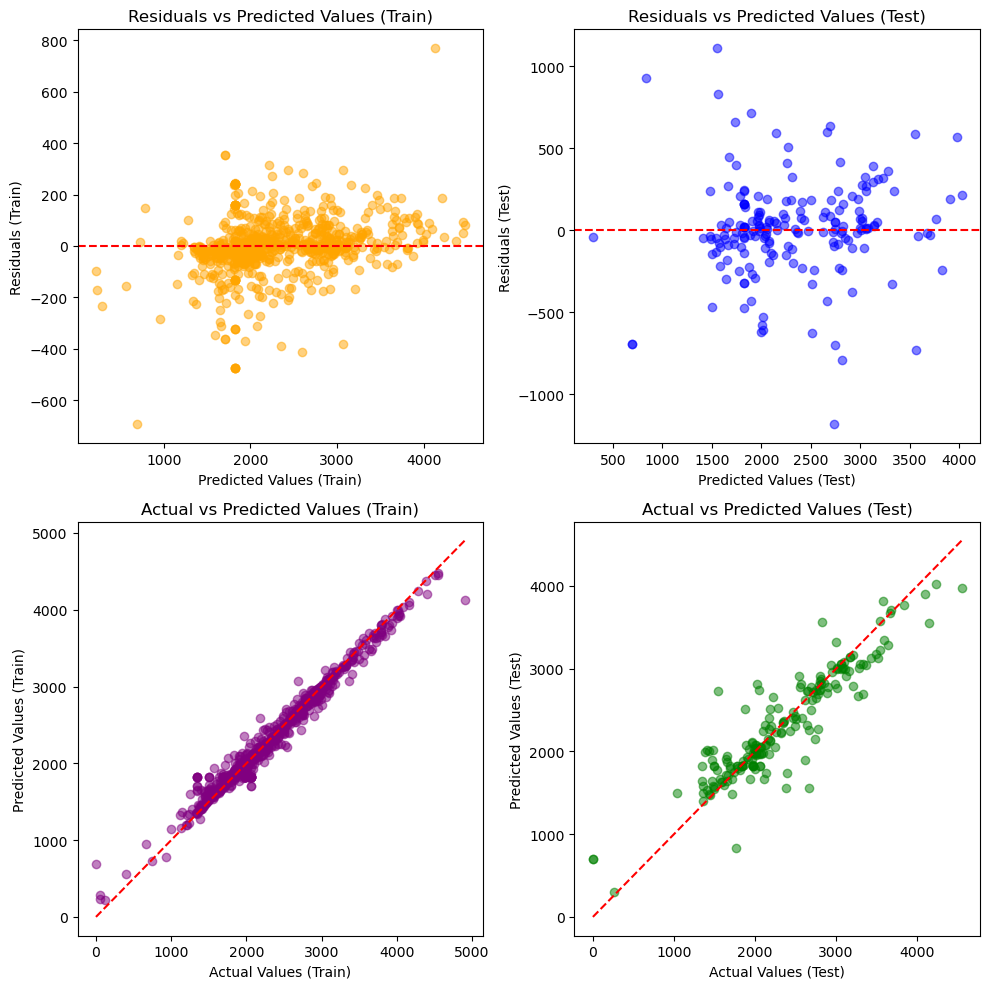

In [79]:
selected_features_rf, best_fitness_rf = feature_selection_pso(X_train, y_train, RandomForestRegressor)
print('Number of selected features:', len(selected_features_rf))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_rf]))
rf_results = evaluate_model(RandomForestRegressor, 'Random Forest', selected_features_rf)
results.append(rf_results)

## Linear Regression

Number of selected features: 14
Selected features: Total_MET, Avg_METs, TrackerDistance, TotalDistance, TotalActiveDistance, TotalSteps, TotalActiveMinutes, SedentaryRatio, LightlyActiveMinutes, VeryActiveMinutes, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


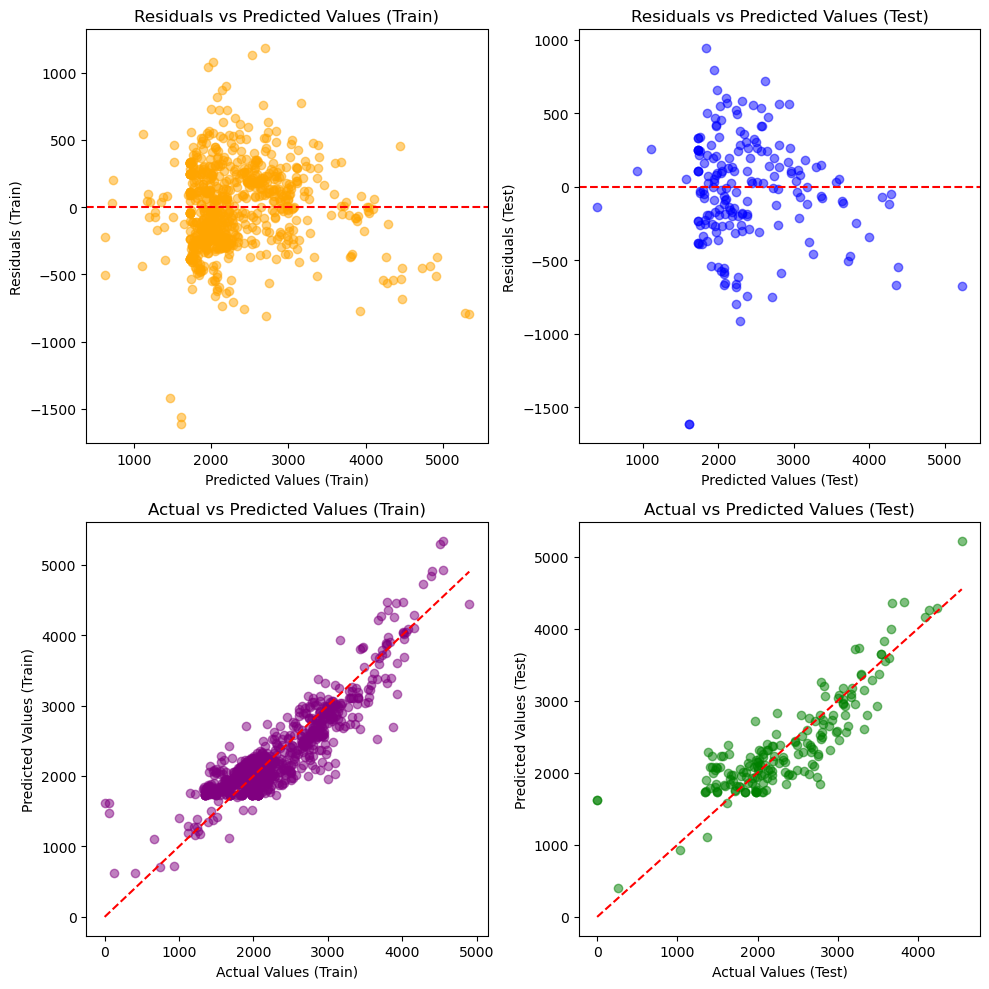

In [80]:
selected_features_lr, best_fitness_lr = feature_selection_pso(X_train, y_train, LinearRegression)
print('Number of selected features:', len(selected_features_lr))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_lr]))
lr_results = evaluate_model(LinearRegression, 'Linear Regression', selected_features_lr)
results.append(lr_results)

## Ridge

Number of selected features: 16
Selected features: Total_MET, TrackerDistance, TotalDistance, StepsbyDistance, TotalActiveDistance, TotalSteps, AverageActiveMinutes, InactiveRatio, ActivityRank, VeryActiveMinutes, LightActiveDistance, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveMinutes, FairlyActiveRatio, ModeratelyActiveDistance


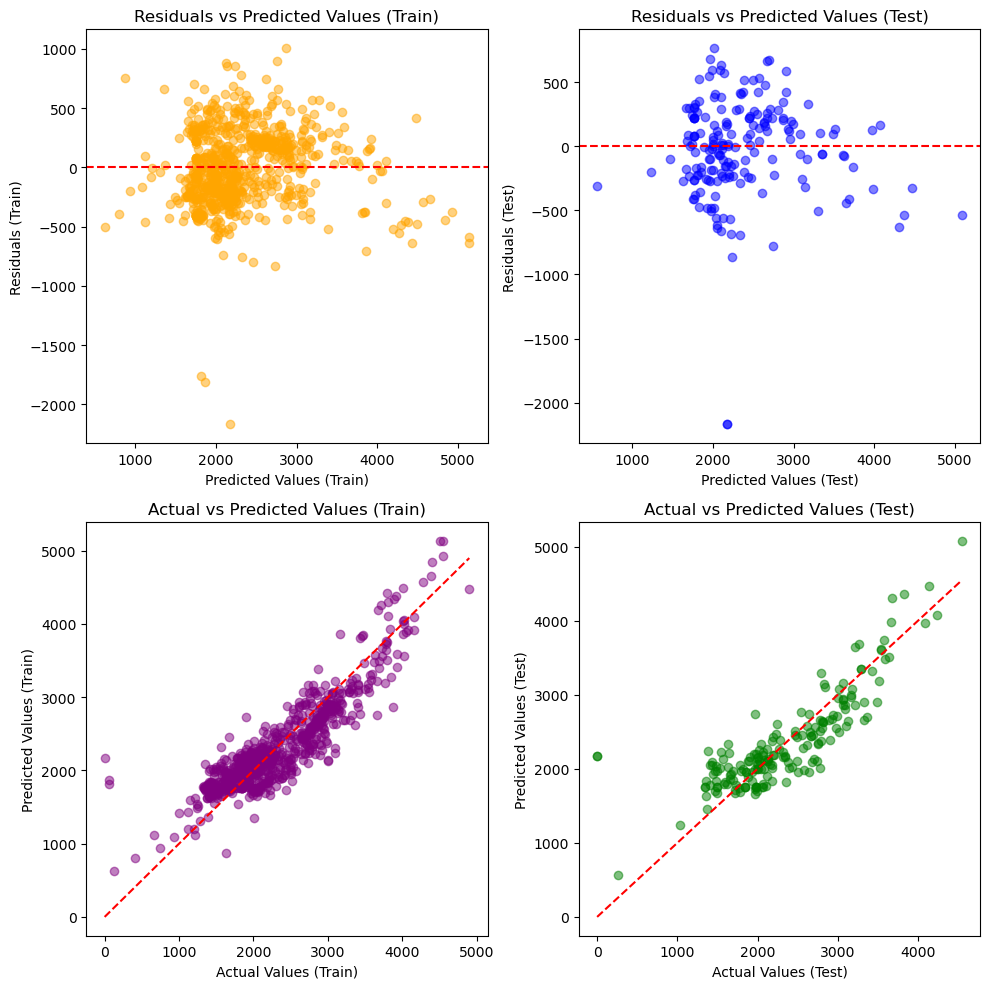

In [81]:
selected_features_ridge, best_fitness_ridge = feature_selection_pso(X_train, y_train, Ridge)
print('Number of selected features:', len(selected_features_ridge))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_ridge]))
ridge_results = evaluate_model(Ridge, 'Ridge', selected_features_ridge)
results.append(ridge_results)

## Lasso

In [82]:
selected_features, best_fitness = feature_selection_pso(X_train, y_train, Lasso)

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e+06, tolerance: 2.597e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+06, tolerance: 2.439e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+06, tolerance: 

In [83]:
print('Number of selected features:', len(selected_features))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features]))

Number of selected features: 14
Selected features: Total_MET, TotalDistance, TotalActiveDistance, TotalSteps, TotalActiveMinutes, AverageActiveMinutes, SedentaryRatio, VeryActiveMinutes, LightActiveDistance, VeryActiveRatio, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.801e+06, tolerance: 3.766e+04
  model = cd_fast.enet_coordinate_descent(


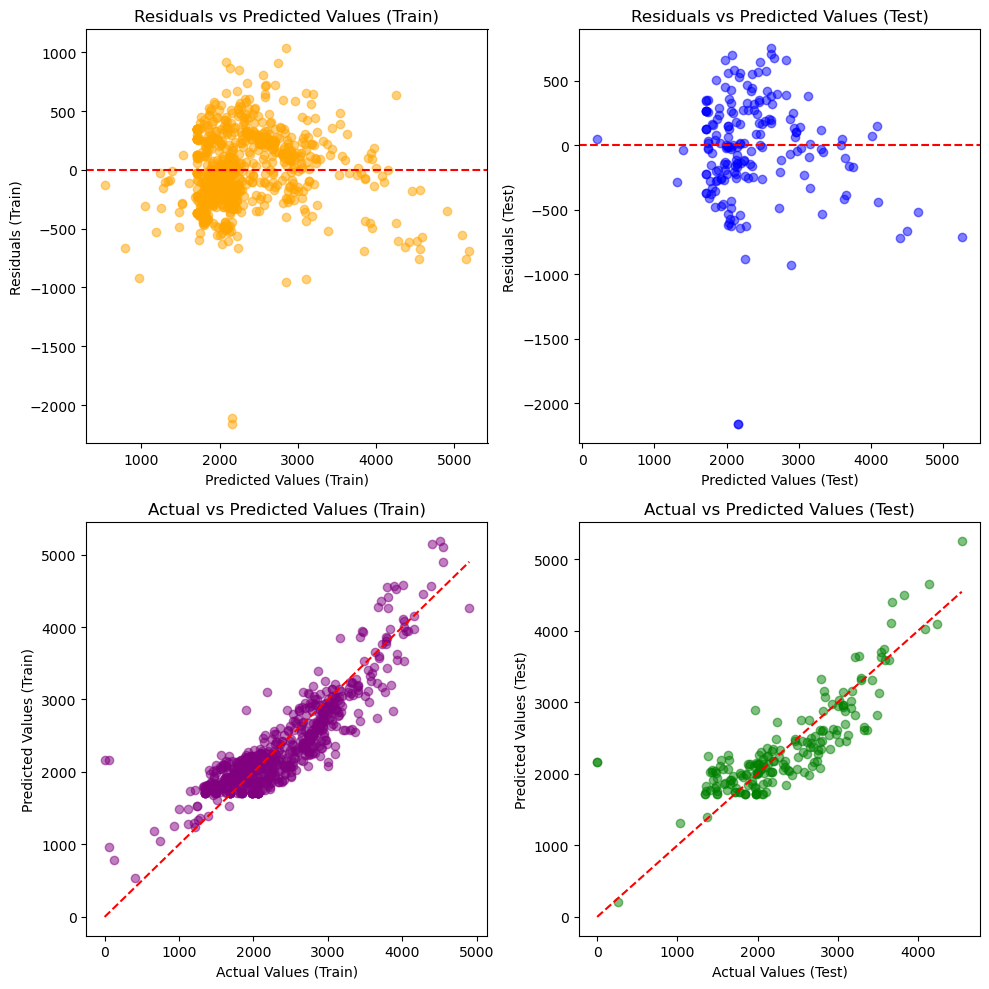

In [84]:
lasso_results = evaluate_model(Lasso, 'Lasso', selected_features)
results.append(lasso_results)

## ElasticNet

Number of selected features: 18
Selected features: Total_MET, Avg_METs, TrackerDistance, TotalDistance, DistancePerStep, StepsbyDistance, TotalSteps, ActiveRatio, DistanceIntensity, InactiveRatio, ActivityRank, LightlyActiveMinutes, VeryActiveMinutes, LightActiveDistance, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveMinutes, ModeratelyActiveDistance


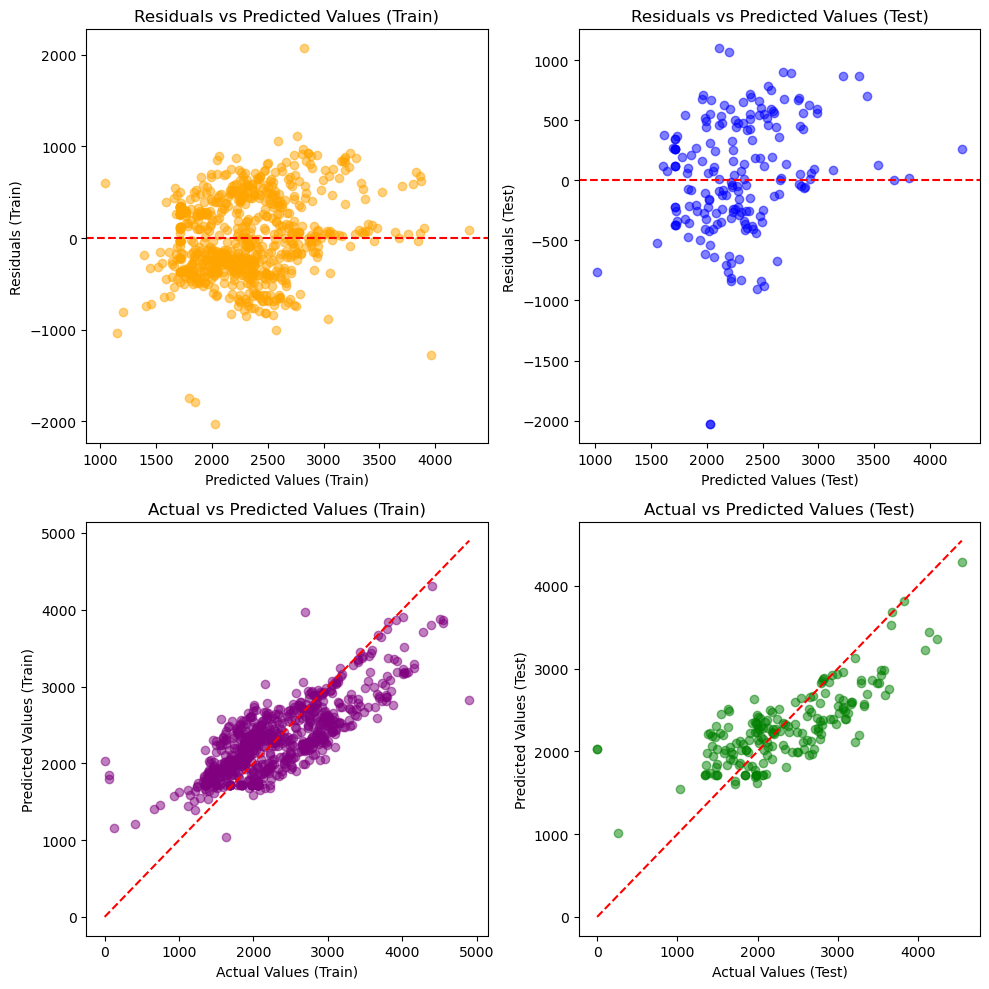

In [85]:
selected_features_en, best_fitness_en = feature_selection_pso(X_train, y_train, ElasticNet)
print('Number of selected features:', len(selected_features_en))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_en]))
en_results = evaluate_model(ElasticNet, 'Elastic Net', selected_features_en)
results.append(en_results)

## Decision Tree

Number of selected features: 15
Selected features: Total_MET, Avg_METs, TotalDistance, DistancePerStep, TotalActiveDistance, InactiveRatio, SedentaryMinutes, SedentaryRatio, LightlyActiveMinutes, VeryActiveMinutes, ActiveGroup, AveragePace, VeryActiveDistance, FairlyActiveMinutes, ModeratelyActiveDistance


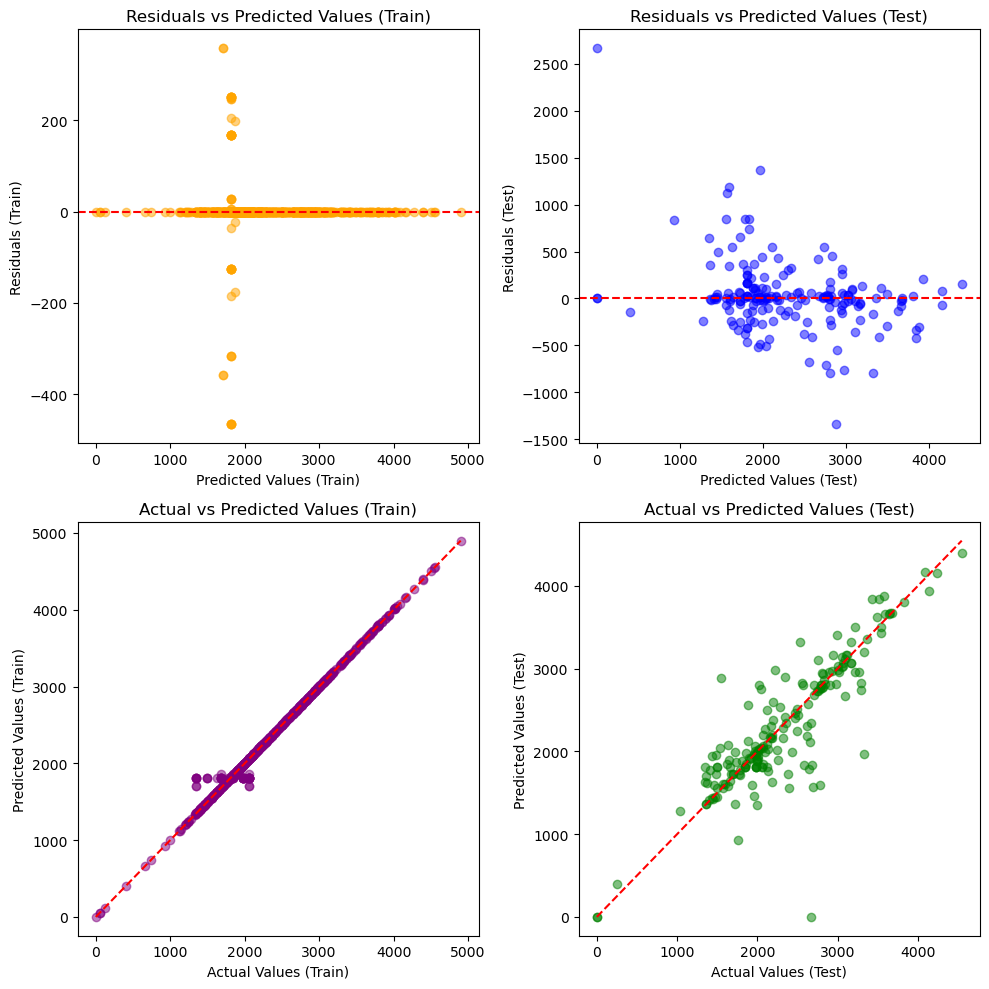

In [86]:
selected_features_dt, best_fitness_dt = feature_selection_pso(X_train, y_train, DecisionTreeRegressor)
print('Number of selected features:', len(selected_features_dt))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_dt]))
dt_results = evaluate_model(DecisionTreeRegressor, 'Decision Tree', selected_features_dt)
results.append(dt_results)

## XGBoost

Number of selected features: 13
Selected features: Total_MET, Avg_METs, TotalDistance, DistancePerStep, StepsbyDistance, TotalSteps, DistanceIntensity, InactiveRatio, ActiveGroup, AveragePace, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


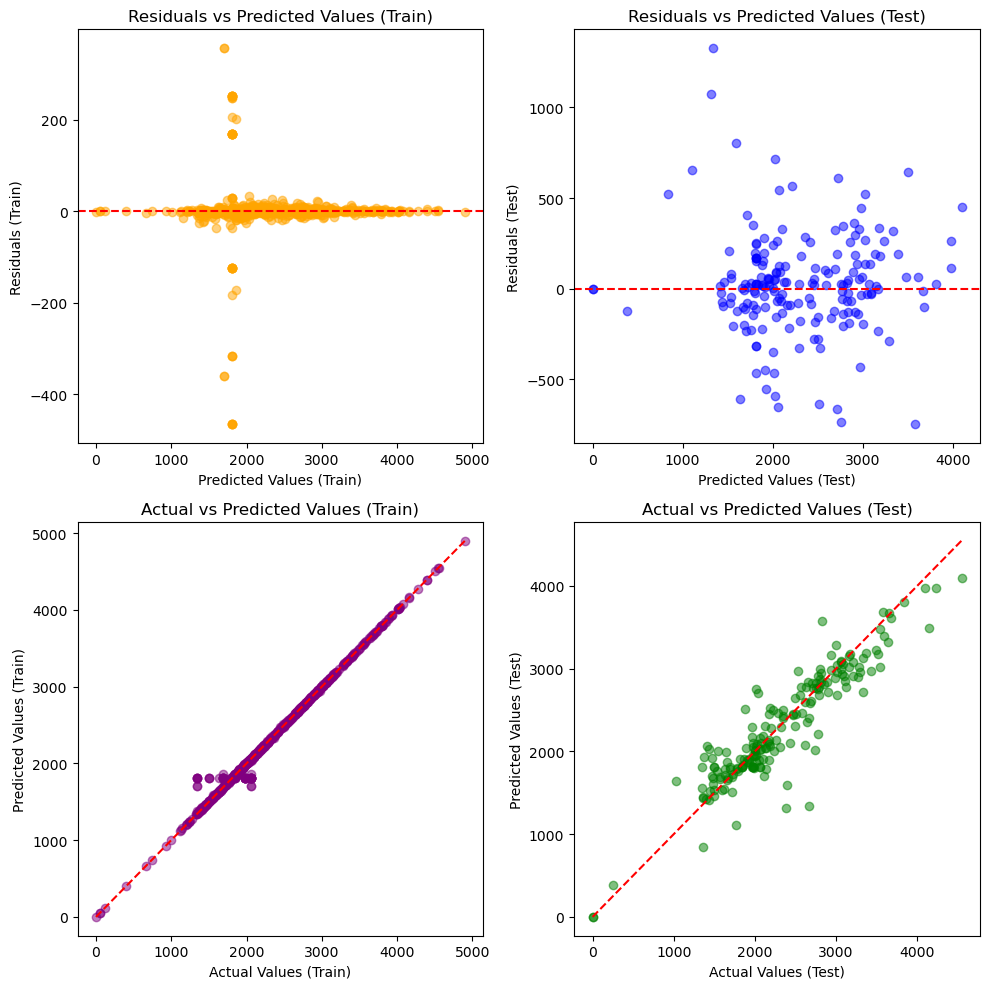

In [87]:
selected_features_xgb, best_fitness_xgb = feature_selection_pso(X_train, y_train, XGBRegressor)
print('Number of selected features:', len(selected_features_xgb))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_xgb]))
xgb_results = evaluate_model(XGBRegressor, 'XGBoost', selected_features_xgb)
results.append(xgb_results)

## Gradient Boosting

Number of selected features: 17
Selected features: Total_MET, Avg_METs, TotalDistance, DistancePerStep, StepsbyDistance, TotalActiveDistance, InactiveRatio, SedentaryMinutes, ActivityRank, VeryActiveMinutes, LightlyActiveRatio, ActiveGroup, AveragePace, VeryActiveRatio, VeryActiveDistance, FairlyActiveMinutes, ModeratelyActiveDistance


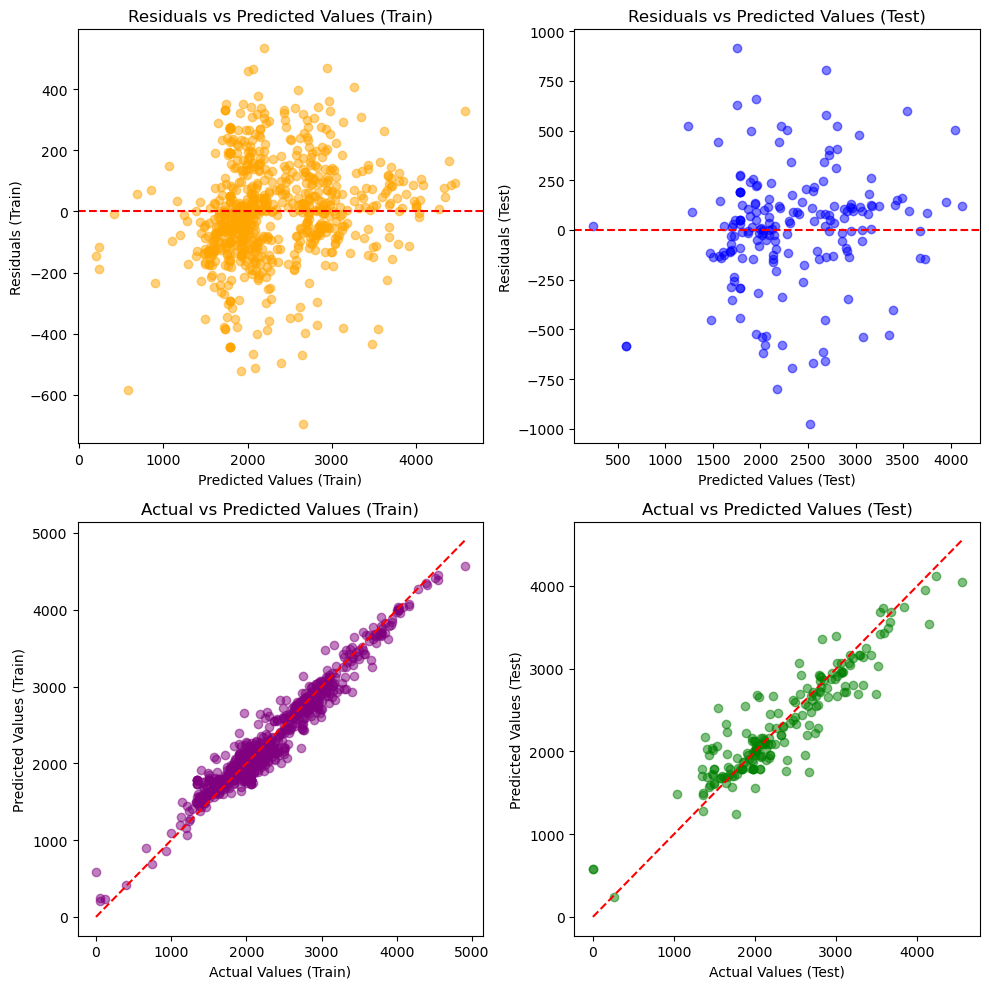

In [88]:
selected_features_gb, best_fitness_gb = feature_selection_pso(X_train, y_train, GradientBoostingRegressor)
print('Number of selected features:', len(selected_features_gb))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_gb]))
gb_results = evaluate_model(GradientBoostingRegressor, 'Gradient Boosting', selected_features_gb)
results.append(gb_results)


## SVR

Number of selected features: 10
Selected features: Total_MET, Avg_METs, TotalActiveDistance, TotalSteps, VeryActiveMinutes, LightActiveDistance, ActiveGroup, AveragePace, VeryActiveRatio, FairlyActiveMinutes


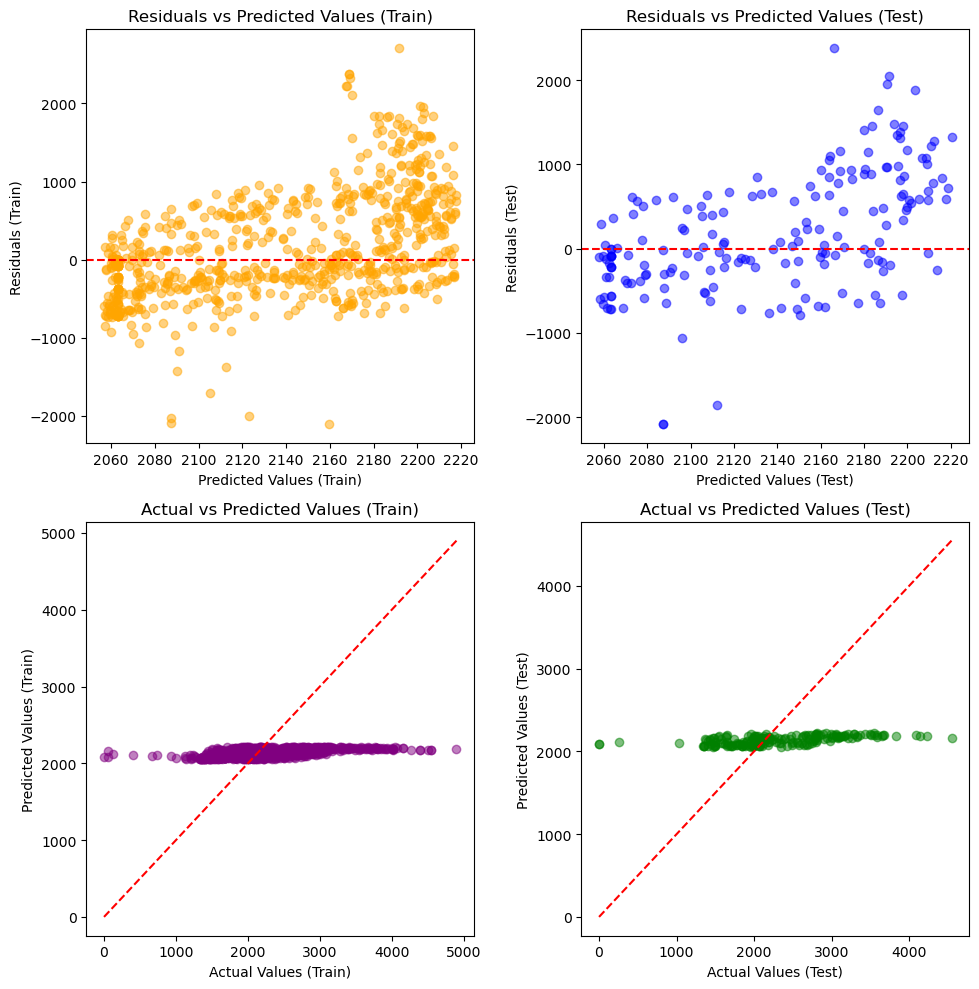

In [89]:
selected_features_svr, best_fitness_svr = feature_selection_pso(X_train, y_train, SVR)
print('Number of selected features:', len(selected_features_svr))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_svr]))
svr_results = evaluate_model(SVR, 'SVR', selected_features_svr)
results.append(svr_results)


## Bayesian Ridge

Number of selected features: 14
Selected features: Total_MET, Avg_METs, TrackerDistance, TotalDistance, StepsbyDistance, TotalSteps, TotalActiveMinutes, AverageActiveMinutes, LightlyActiveMinutes, VeryActiveMinutes, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


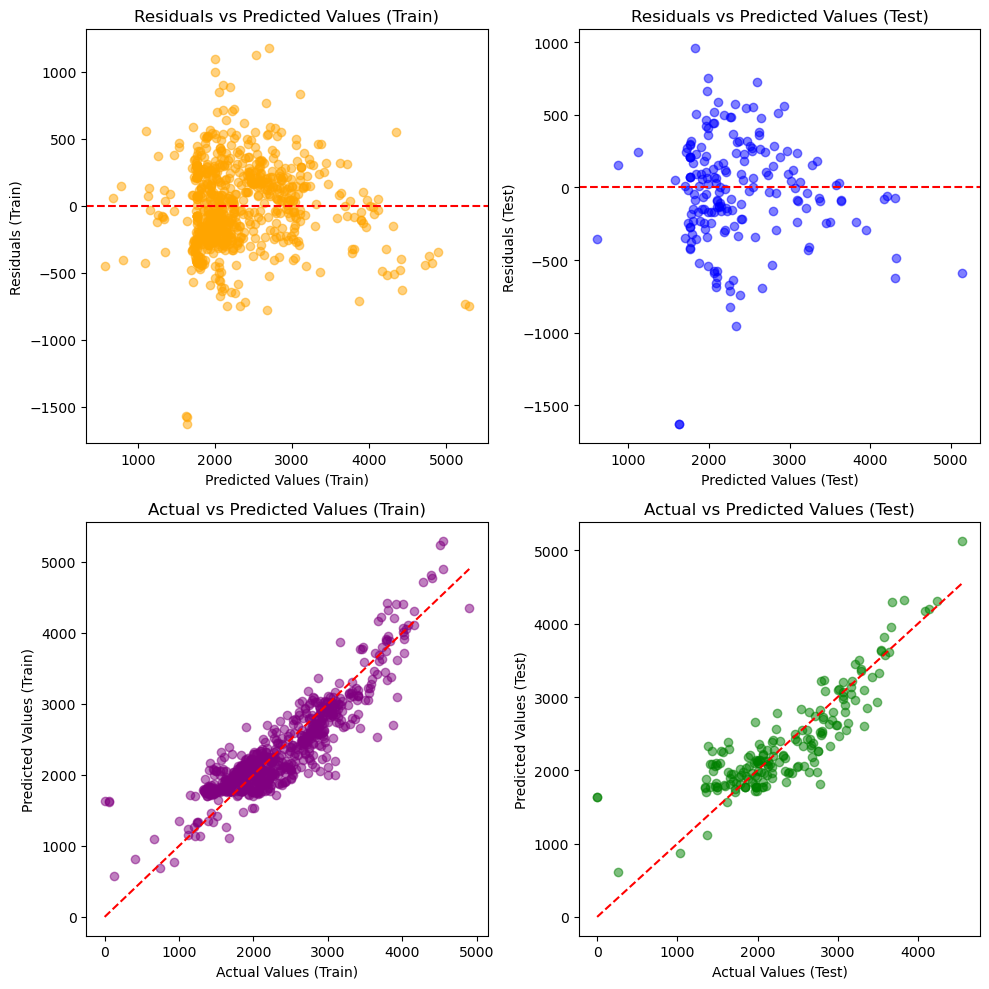

In [90]:
selected_features_br, best_fitness_br = feature_selection_pso(X_train, y_train, BayesianRidge)
print('Number of selected features:', len(selected_features_br))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_br]))
br_results = evaluate_model(BayesianRidge, 'Bayesian Ridge', selected_features_br)
results.append(br_results)

## CatBoost

Number of selected features: 13
Selected features: Total_MET, Avg_METs, TotalDistance, DistancePerStep, TotalActiveDistance, TotalActiveMinutes, SedentaryMinutes, ActivityRank, VeryActiveMinutes, AveragePace, VeryActiveDistance, FairlyActiveMinutes, ModeratelyActiveDistance
Learning rate set to 0.039132
0:	learn: 690.4338053	total: 3.06ms	remaining: 3.06s
1:	learn: 673.1929364	total: 5.88ms	remaining: 2.94s
2:	learn: 656.2028216	total: 8.94ms	remaining: 2.97s
3:	learn: 641.2927855	total: 11.8ms	remaining: 2.93s
4:	learn: 626.2329571	total: 14.9ms	remaining: 2.96s
5:	learn: 612.2644162	total: 17.6ms	remaining: 2.92s
6:	learn: 598.2943302	total: 21.2ms	remaining: 3.01s
7:	learn: 585.2561928	total: 23.9ms	remaining: 2.97s
8:	learn: 572.9892670	total: 26.9ms	remaining: 2.96s
9:	learn: 561.3857393	total: 29.9ms	remaining: 2.96s
10:	learn: 549.8429130	total: 32.2ms	remaining: 2.9s
11:	learn: 538.2861751	total: 36ms	remaining: 2.97s
12:	learn: 528.0218247	total: 39ms	remaining: 2.96s
13:	lear

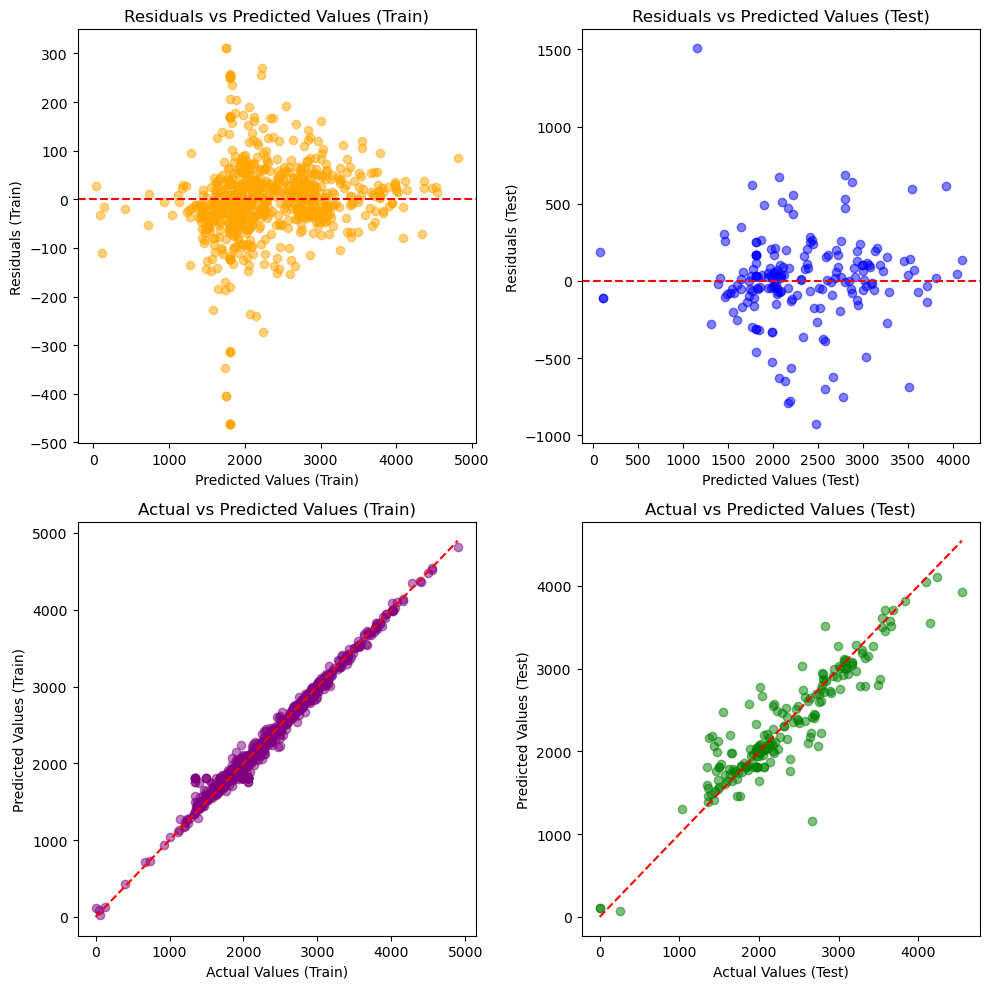

In [92]:
selected_features_cb, best_fitness_cb = feature_selection_pso(X_train, y_train, CatBoostRegressor(verbose=0))
print('Number of selected features:', len(selected_features_cb))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_cb]))
cb_results = evaluate_model(CatBoostRegressor, 'CatBoost', selected_features_cb)
results.append(cb_results)

## LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 15
[LightGBM] [Info] Start training from score 2279.692000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

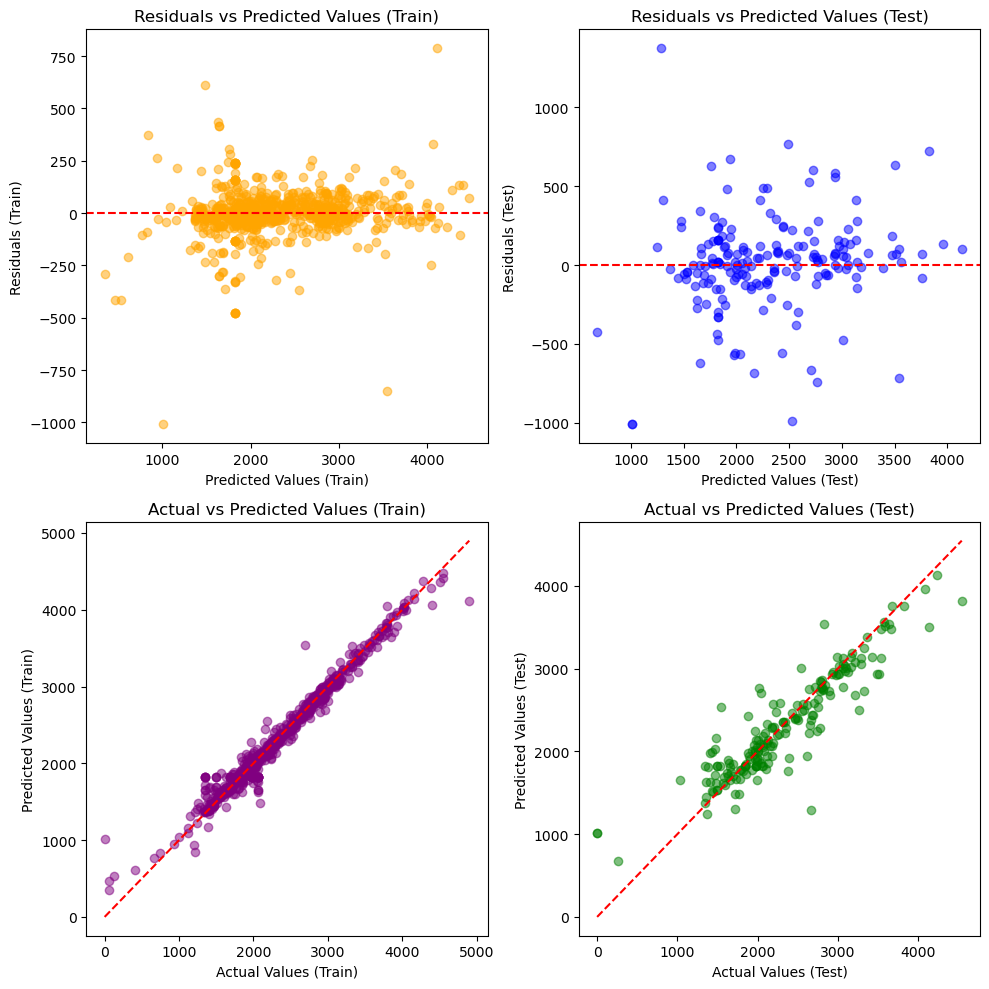

In [93]:
selected_features_lgbm, best_fitness_lgbm = feature_selection_pso(X_train, y_train, LGBMRegressor)
print('Number of selected features:', len(selected_features_lgbm))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_lgbm]))
lgbm_results = evaluate_model(LGBMRegressor, 'LightGBM', selected_features_lgbm)
results.append(lgbm_results)

## ExtraTrees

Number of selected features: 11
Selected features: Total_MET, TotalDistance, DistancePerStep, StepsbyDistance, TotalSteps, ActiveRatio, InactiveRatio, AveragePace, ActiveDistanceRatio, TotalUsageMinutes, ModeratelyActiveDistance


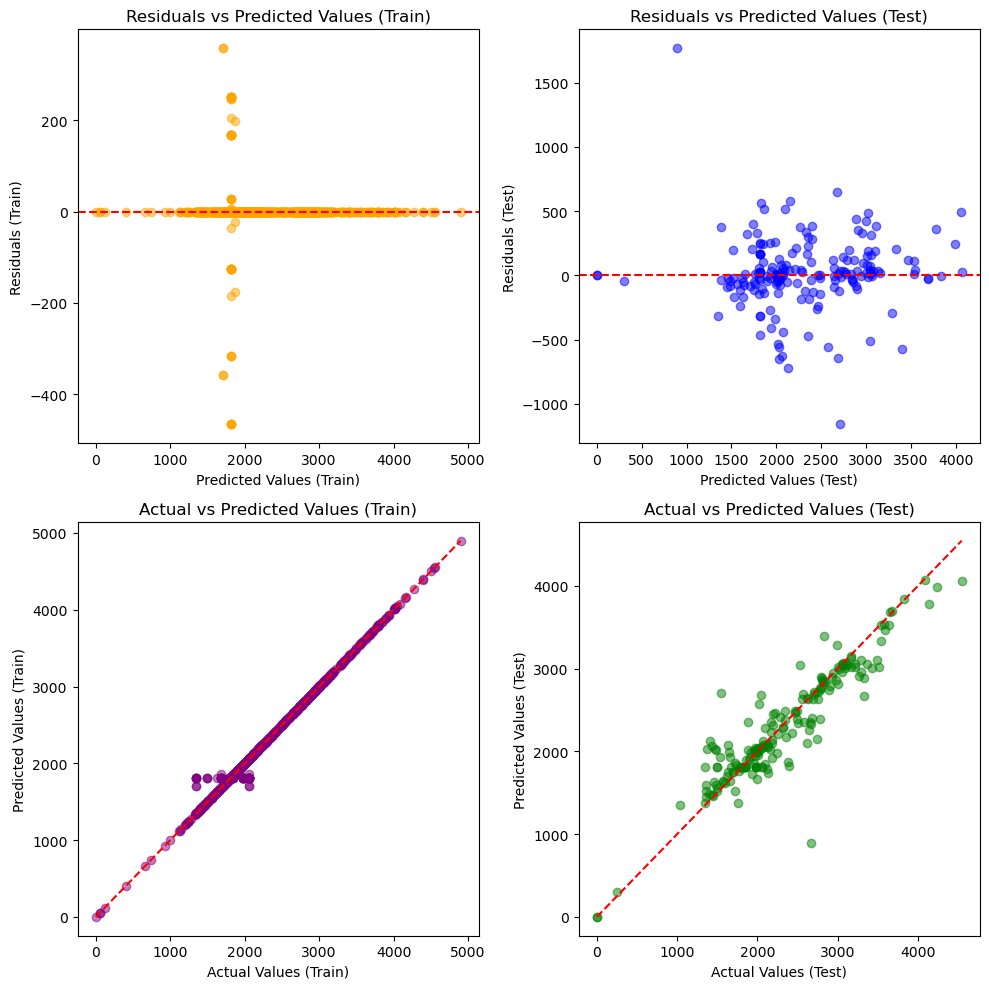

In [94]:
selected_features_et, best_fitness_et = feature_selection_pso(X_train, y_train, ExtraTreesRegressor)
print('Number of selected features:', len(selected_features_et))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_et]))
et_results = evaluate_model(ExtraTreesRegressor, 'ExtraTrees', selected_features_et)
results.append(et_results)

## Huber Regressor

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

Number of selected features: 16
Selected features: Total_MET, Avg_METs, TrackerDistance, TotalDistance, TotalActiveDistance, TotalSteps, TotalActiveMinutes, AverageActiveMinutes, DistanceIntensity, SedentaryRatio, LightlyActiveMinutes, VeryActiveMinutes, VeryActiveRatio, VeryActiveDistance, ActiveDistanceRatio, ModeratelyActiveDistance


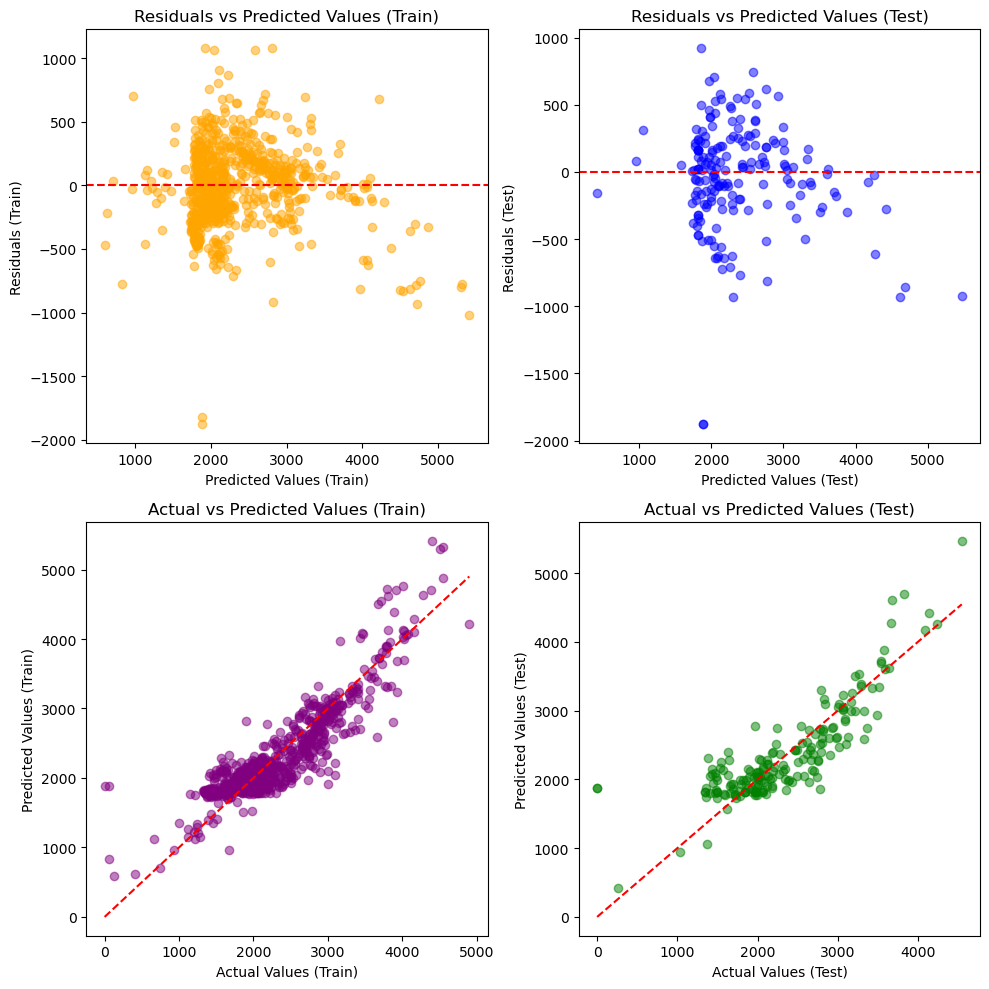

In [95]:
selected_features_huber, best_fitness_huber = feature_selection_pso(X_train, y_train, HuberRegressor)
print('Number of selected features:', len(selected_features_huber))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_huber]))
huber_results = evaluate_model(HuberRegressor, 'Huber Regressor', selected_features_huber)
results.append(huber_results)

## RANSAC Regression

Number of selected features: 11
Selected features: Total_MET, Avg_METs, TotalActiveMinutes, SedentaryMinutes, LightlyActiveMinutes, VeryActiveMinutes, LightlyActiveRatio, ActiveGroup, AveragePace, FairlyActiveMinutes, FairlyActiveRatio


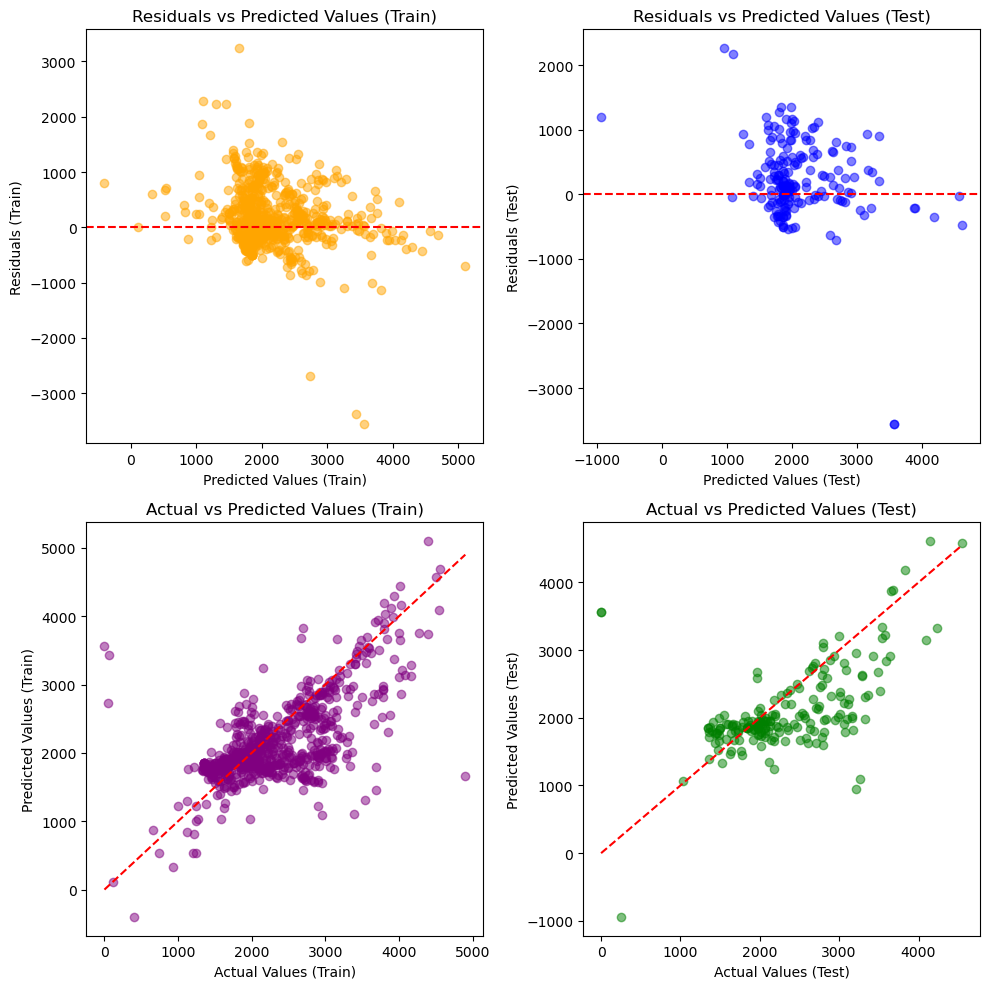

In [96]:
selected_features_ransac, best_fitness_ransac = feature_selection_pso(X_train, y_train, RANSACRegressor)
print('Number of selected features:', len(selected_features_ransac))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_ransac]))
ransac_results = evaluate_model(RANSACRegressor, 'RANSAC Regression', selected_features_ransac)
results.append(ransac_results)


## Theil-Sen Regression

Number of selected features: 18
Selected features: Total_MET, TotalDistance, TotalActiveDistance, TotalSteps, TotalActiveMinutes, AverageActiveMinutes, DistanceIntensity, InactiveRatio, SedentaryRatio, ActivityRank, VeryActiveMinutes, LightActiveDistance, LightlyActiveRatio, VeryActiveRatio, VeryActiveDistance, ActiveDistanceRatio, FairlyActiveRatio, ModeratelyActiveDistance


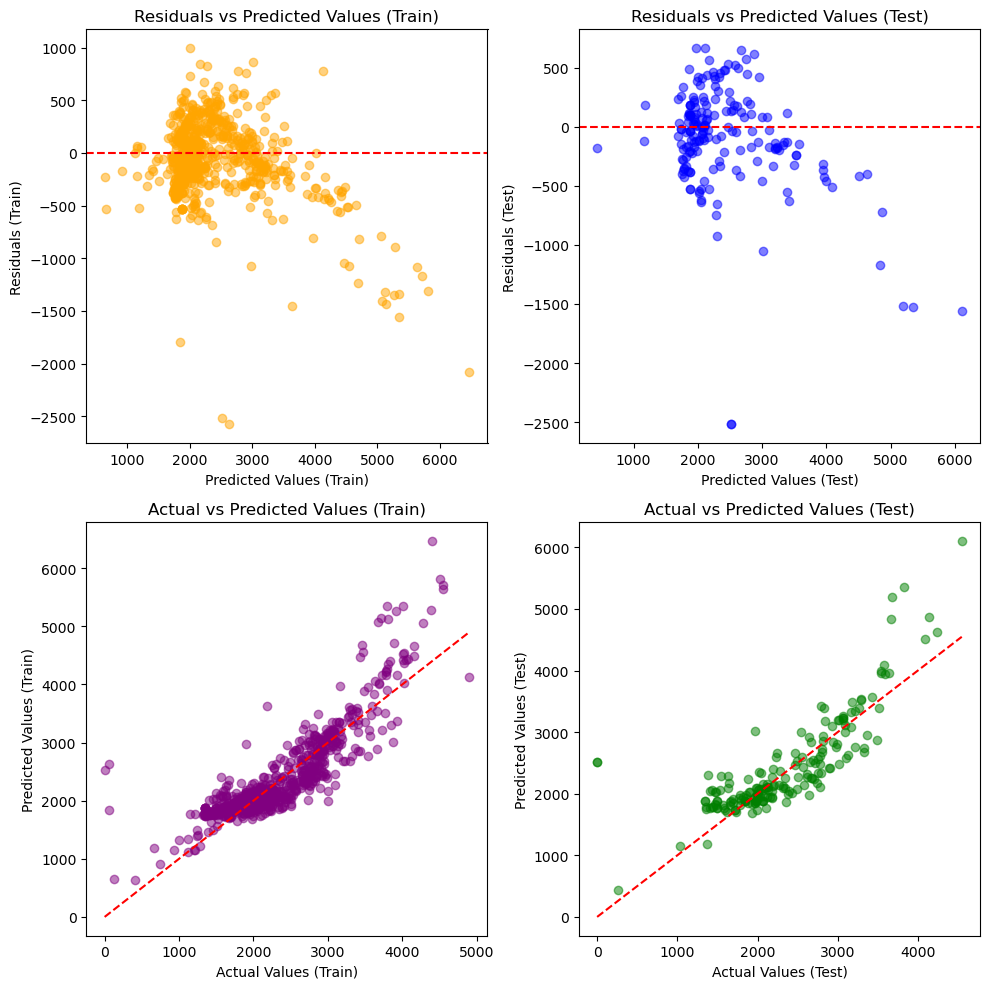

In [97]:
selected_features_ts, best_fitness_ts = feature_selection_pso(X_train, y_train, TheilSenRegressor)
print('Number of selected features:', len(selected_features_ts))
print('Selected features:', ', '.join([feature_names[i] for i in selected_features_ts]))
ts_results = evaluate_model(TheilSenRegressor, 'Theil-Sen Regression', selected_features_ts)
results.append(ts_results)

In [116]:
pd.set_option('display.float_format', '{:.4f}'.format)

res = pd.DataFrame(results)

In [117]:
# Calculating metrics based on user's expected format

res['RMSE Difference'] = abs(res['RMSE Train'] - res['RMSE Test'])

res['R2 Difference'] = abs(res['R2 Train'] - res['R2 Test'])

res['MAE Difference'] = abs(res['MAE Train'] - res['MAE Test'])

res['Mean Residual Train'] = res['Residuals Train']

res['Mean Residual Test'] = res['Residuals Test']

res['MAPE Difference'] = abs(res['MAPE Train'] - res['MAPE Test'])

ordered_columns = [

    'Model', 'RMSE Train', 'RMSE Test', 'RMSE Difference', 

    'R2 Train', 'R2 Test', 'R2 Difference', 'MAE Train', 'MAE Test', 'MAE Difference', 

    'Mean Residual Train', 'Mean Residual Test', 'MAPE Train', 'MAPE Test', 'MAPE Difference'

]

# Reorder the columns in the final DataFrame

res = res[ordered_columns]

res.sort_values(by=['MAE Test', 'MAE Difference'], ascending=[True,True])


Model  RMSE Train  RMSE Test  RMSE Difference  R2 Train  \
12            ExtraTrees     64.0111   282.1238         218.1126    0.9918   
10              CatBoost     90.1720   291.4057         201.2337    0.9838   
6                XGBoost     64.3119   286.4453         222.1334    0.9918   
0          Random Forest    114.1484   299.4067         185.2583    0.9740   
11              LightGBM    120.7026   305.1500         184.4474    0.9709   
7      Gradient Boosting    166.8676   292.9245         126.0569    0.9445   
5          Decision Tree     64.0111   386.6922         322.6810    0.9918   
9         Bayesian Ridge    314.3267   375.4481          61.1214    0.8030   
2                  Ridge    322.5847   393.6671          71.0824    0.7925   
13       Huber Regressor    319.7532   396.7229          76.9696    0.7961   
1      Linear Regression    316.1861   379.7415          63.5554    0.8006   
3                  Lasso    326.1106   406.4595          80.3489    0.7879   
15  Theil-Sen Regression    373.2287   463.8637          90.6350    0.7222   
4            Elastic Net    445.1744   489.3655          44.1911    0.6048   
14     RANSAC Regression    563.0563   675.9957         112.9395    0.3677   
8                    SVR    698.0228   733.4097          35.3869    0.0283   

    R2 Test  R2 Difference  MAE Train  MAE Test  MAE Difference  \
12   0.8538         0.1381    14.4160  175.7503        161.3343   
10   0.8440         0.1398    59.0572  192.6690        133.6118   
6    0.8493         0.1425    18.2877  194.9700        176.6823   
0    0.8353         0.1387    72.0201  199.5778        127.5577   
11   0.8289         0.1420    70.9647  201.7179        130.7532   
7    0.8424         0.1021   126.5882  208.4728         81.8846   
5    0.7253         0.2665    14.4160  223.8037        209.3877   
9    0.7410         0.0619   246.7625  280.8244         34.0619   
2    0.7153         0.0772   255.2603  283.4158         28.1555   
13   0.7109         0.0852   241.5858  285.3999         43.8141   
1    0.7351         0.0655   249.4019  286.3837         36.9818   
3    0.6965         0.0914   255.7600  292.4186         36.6586   
15   0.6047         0.1175   261.3458  307.2129         45.8671   
4    0.5600         0.0447   364.4684  384.9262         20.4578   
14   0.1605         0.2073   385.0367  451.2821         66.2454   
8    0.0118         0.0165   528.0948  560.2083         32.1135   

                                  Mean Residual Train  \
12  0        0.0000
1        0.0000
2        0.000...   
10  0        8.0416
1      104.8588
2      -29.242...   
6   0       -0.6188
1        0.5847
2       -0.746...   
0   0       16.6600
1      196.5100
2       42.480...   
11  0       20.8911
1       47.9633
2      -19.835...   
7   0      -12.2704
1      308.2713
2      102.208...   
5   0        0.0000
1        0.0000
2        0.000...   
9   0       11.0457
1     1124.7579
2      283.315...   
2   0       -8.9078
1      900.2415
2      304.257...   
13  0       50.5174
1     1067.4192
2      327.771...   
1   0      -36.1348
1     1128.8915
2      295.050...   
3   0      -34.5268
1      910.2837
2      331.079...   
15  0       31.5777
1      759.6585
2      272.343...   
4   0     -133.0880
1     1064.3123
2       60.727...   
14  0      341.9936
1      788.8916
2      270.223...   
8   0     -136.1790
1     1469.9809
2      175.678...   

                                   Mean Residual Test             MAPE Train  \
12  0      -19.6600
1      116.3900
2      246.350...                 0.0085   
10  0       35.8820
1      199.5700
2       21.896...   661962348156933.5000   
6   0       16.7604
1      190.0730
2      197.635...     3717569064016.4575   
0   0       -2.5300
1      121.5500
2      113.770...  4165955588196770.0000   
11  0       -3.3081
1      219.1786
2      306.751...  6056579105904646.0000   
7   0      -50.2984
1      245.5488
2      -57.802...  3497481675705817.0000   
5   0        0.0000
1 

Gradient boosting sepertinya paling bagus